Importing!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from keras.datasets import mnist
from keras import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import glob
from skimage import io
import os
import scipy.misc
from scipy.misc import imread, imresize
from keras import regularizers
import csv
from keras.datasets import cifar10
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


Extracting the data

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


Text(0.5,1,'Class [1]')

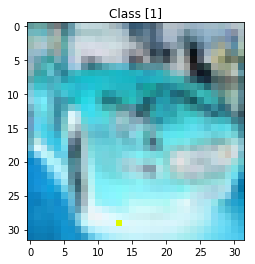

In [6]:
plt.imshow(X_train[5])
plt.title('Class '+ str(y_train[5]))

In [7]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)


Generating Image data

In [8]:
gen = ImageDataGenerator(width_shift_range=.2, 
                             height_shift_range=.2,
                         shear_range=0.2, zoom_range=0.2)

test_gen = ImageDataGenerator()
train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)


Model description.

In [9]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))

model.add(Activation('softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)        0         
__________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])

In [12]:
#Training data
x = model.fit_generator(train_generator, epochs=200, 
                    validation_data=test_generator)

Epoch 1/200
1563/1563 [==============================] - 29s 19ms/step - loss: 1.8011 - acc: 0.3594 - val_loss: 2.6558 - val_acc: 0.2929
Epoch 2/200
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3202 - acc: 0.5265 - val_loss: 1.0441 - val_acc: 0.6333
Epoch 3/200
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1286 - acc: 0.5987 - val_loss: 1.1977 - val_acc: 0.6055
Epoch 4/200
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0121 - acc: 0.6452 - val_loss: 0.9440 - val_acc: 0.6673
Epoch 5/200
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9127 - acc: 0.6850 - val_loss: 0.9555 - val_acc: 0.6930
Epoch 6/200
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8582 - acc: 0.7042 - val_loss: 0.7019 - val_acc: 0.7565
Epoch 7/200
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8066 - acc: 0.7226 - val_loss: 0.8306 - val_acc: 0.7222
Epoch 8/200
1563/1563 [==================

1563/1563 [==============================] - 27s 17ms/step - loss: 0.2986 - acc: 0.8969 - val_loss: 0.5472 - val_acc: 0.8520
Epoch 61/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2922 - acc: 0.8992 - val_loss: 0.5421 - val_acc: 0.8502
Epoch 62/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2866 - acc: 0.9018 - val_loss: 0.5197 - val_acc: 0.8489
Epoch 63/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2853 - acc: 0.9021 - val_loss: 0.4926 - val_acc: 0.8587
Epoch 64/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2795 - acc: 0.9039 - val_loss: 0.6234 - val_acc: 0.8388
Epoch 65/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2812 - acc: 0.9027 - val_loss: 0.5313 - val_acc: 0.8465
Epoch 66/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2791 - acc: 0.9039 - val_loss: 0.5041 - val_acc: 0.8592
Epoch 67/200
1563/1563 [=======================

1563/1563 [==============================] - 27s 17ms/step - loss: 0.1996 - acc: 0.9341 - val_loss: 0.6036 - val_acc: 0.8594
Epoch 120/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1928 - acc: 0.9335 - val_loss: 0.5616 - val_acc: 0.8621
Epoch 121/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1931 - acc: 0.9339 - val_loss: 0.6207 - val_acc: 0.8547
Epoch 122/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1883 - acc: 0.9351 - val_loss: 0.5987 - val_acc: 0.8570
Epoch 123/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1885 - acc: 0.9345 - val_loss: 0.5181 - val_acc: 0.8659
Epoch 124/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1904 - acc: 0.9346 - val_loss: 0.4974 - val_acc: 0.8737
Epoch 125/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1855 - acc: 0.9358 - val_loss: 0.5520 - val_acc: 0.8698
Epoch 126/200
1563/1563 [================

1563/1563 [==============================] - 27s 17ms/step - loss: 0.1542 - acc: 0.9476 - val_loss: 0.6622 - val_acc: 0.8551
Epoch 179/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1541 - acc: 0.9474 - val_loss: 0.6792 - val_acc: 0.8565
Epoch 180/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1547 - acc: 0.9474 - val_loss: 0.6522 - val_acc: 0.8514
Epoch 181/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1563 - acc: 0.9466 - val_loss: 0.6817 - val_acc: 0.8621
Epoch 182/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1496 - acc: 0.9495 - val_loss: 0.5850 - val_acc: 0.8686
Epoch 183/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1498 - acc: 0.9493 - val_loss: 0.6060 - val_acc: 0.8674
Epoch 184/200
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1502 - acc: 0.9490 - val_loss: 0.5817 - val_acc: 0.8750
Epoch 185/200
1563/1563 [================

Plotting loss and accuracy

In [13]:
print(x.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


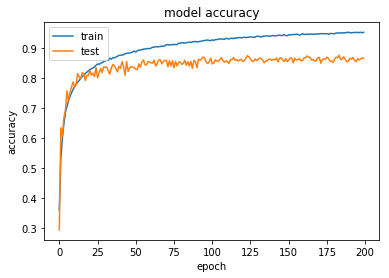

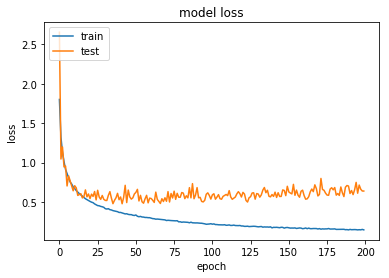

In [14]:
plt.plot(x.history['acc'])
plt.plot(x.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test loss: ', score[0])
print('Test Accuracy', score[1])